# About Dataset

## Context
I was always fascinated by the food culture of Bengaluru. Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, Russia to Antarctica, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food. The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

## Content
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.
With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing
day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with
established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of
the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.
With such an overwhelming demand of restaurants it has therefore become important to study the demography
of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.
If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are
mostly vegetarian.

The data is accurate to that available on the zomato website until 15 March 2019.

## Questions answered through this EDA
1. Which are the top locations with most number of restaurants?
2. What are the various listing types?
3. Which restaurant has most number of votes?
4. What is the average rating for each cost range?
5. What type of restaurant gets the best rating?
6. What is the average cost of two for each type of restaurant?
7. Which restaurant type recieves the most votes?

Data Source: https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [286]:
df=pd.read_csv("zomato.csv")

In [287]:
df.shape

(51717, 17)

In [288]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [289]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [290]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

Columns like url, address, phone, dish_liked, cuisines, menu_item will not play important role in this analysis therefore dropping these columns.

In [291]:
df = df.drop(['url', 'address', 'phone', 'dish_liked', 'cuisines', 'reviews_list', 'menu_item'], axis = 1)

In [292]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [293]:
df.isnull().mean()*100

name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
location                        0.040606
rest_type                       0.438927
approx_cost(for two people)     0.669026
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

# Data Cleaning

### Handling Missing Data

First lets deal with the rate column.

In [294]:
rate_temp=[]
for i in df.rate:
    s=str(i).split('/')
    rate_temp.append(s[0])
df.rate=rate_temp

In [295]:
df.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [296]:
df.loc[(df.rate=="NEW"),"rate"]=0

In [297]:
df[df.rate=="-"]

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
3068,House of Tasty Food,No,No,-,0,Wilson Garden,Quick Bites,400,Delivery,Basavanagudi
3069,Super Chef's (New Royal treat),No,No,-,0,Bannerghatta Road,Quick Bites,NaN,Delivery,Basavanagudi
3373,Right Pizza,Yes,No,-,0,Basavanagudi,Quick Bites,300,Dine-out,Basavanagudi
3378,Mezban Family Restaurant,Yes,No,-,0,Basavanagudi,Quick Bites,300,Dine-out,Basavanagudi
3387,Mota Bawarchi,No,No,-,0,Basavanagudi,Quick Bites,300,Dine-out,Basavanagudi
...,...,...,...,...,...,...,...,...,...,...
33454,Deepam Tiffins,No,No,-,0,BTM,Quick Bites,300,Delivery,Koramangala 6th Block
33463,Hotel Orchid,No,No,-,0,BTM,Casual Dining,500,Delivery,Koramangala 6th Block
45646,Sri Udupi,Yes,No,-,0,Old Airport Road,Quick Bites,400,Dine-out,Old Airport Road
45647,Frozen Bite,Yes,No,-,0,Old Airport Road,Beverage Shop,250,Dine-out,Old Airport Road


In [298]:
df.loc[(df.rate=="-"),"rate"]=0

In [299]:
df=df.astype({'rate': 'float'})

In [300]:
df[df.rate.isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
84,Chill Out,No,No,NaN,0,Banashankari,Quick Bites,100,Delivery,Banashankari
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,500,Delivery,Banashankari
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",400,Delivery,Banashankari
92,Annapooraneshwari Mess,No,No,NaN,0,Banashankari,Mess,200,Delivery,Banashankari
107,Coffee Shopee,No,No,NaN,0,Banashankari,"Takeaway, Delivery",250,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51644,Punjabi Thadka,No,No,NaN,0,Brookefield,Quick Bites,400,Dine-out,Whitefield
51675,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,900,Drinks & nightlife,Whitefield
51710,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,900,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,600,Pubs and bars,Whitefield


It can be observed that all the rows which has null value in rate has 0 in votes. This can because the restaurants are newly opened therefore there is no rating for these restaurants.

Lets further investigate into this for better understanding.

In [301]:
len(df[df.rate.isnull()])

7775

In [302]:
len(df.loc[(df.rate.isnull()) & (df.votes==0)])

7731

Therefore not all rows having null value in rate is having 0 in votes.

Lets first deal with all the rows having null value in rate and 0 in votes. These restaurants are surely newly opened and has not recieved any rating yet. Replacing all these rows with rating 0.

In [303]:
df.loc[(df.rate.isnull()) & (df.votes==0),"rate"]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

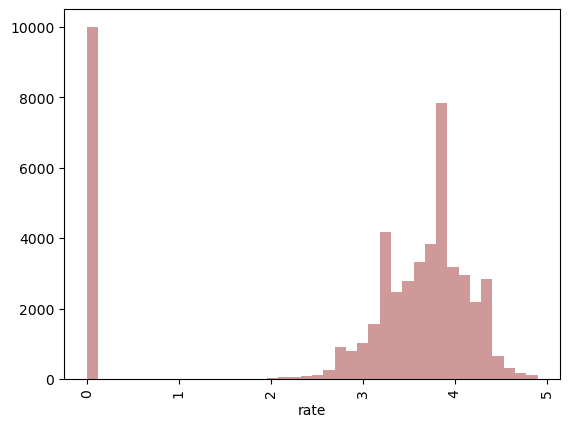

In [304]:
sns.distplot(df['rate'].dropna(),kde=False,color='darkred',bins=40)
plt.xticks(rotation=90)

In [305]:
df.rate[df.rate.isnull()]=df.rate.median()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now lets clean the approx_cost(for two people) column.

In [306]:
df.rename(columns = {'approx_cost(for two people)':'cost_2'}, inplace = True)

In [307]:
temp_cost=[]
for i in df.cost_2:
    i=str(i)
    r=i.replace(",", "")
    temp_cost.append(r)
df.cost_2=temp_cost

In [308]:
df.sample(5)

,name,online_order,book_table,rate,votes,location,rest_type,cost_2,listed_in(type),listed_in(city)
11975,Aishwarya Uphar,No,No,0.0,0,Ulsoor,Quick Bites,150,Delivery,Church Street
6872,Jhanhavi Restaurant,Yes,No,3.1,105,Marathahalli,Quick Bites,400,Delivery,Brookefield
38861,Sandhya Sagar,No,No,0.0,0,Shanti Nagar,Quick Bites,300,Dine-out,Lavelle Road
6097,Tree Tops Bar & Kitchen,No,Yes,4.4,189,Lavelle Road,"Casual Dining, Bar",1000,Dine-out,Brigade Road
40300,Cinnamon,No,No,3.7,28,Seshadripuram,Casual Dining,1000,Dine-out,Malleshwaram


In [309]:
df=df.astype({'cost_2': 'float'})

In [310]:
df.groupby(by=["listed_in(type)"])["cost_2"].median()

listed_in(type)
Buffet                1200.0
Cafes                  600.0
Delivery               400.0
Desserts               350.0
Dine-out               400.0
Drinks & nightlife    1300.0
Pubs and bars         1200.0
Name: cost_2, dtype: float64

Replacing the null values of cost for 2 column with the respective median of the listed_in(type) column

In [311]:
df.loc[(df.cost_2.isnull()) & (df["listed_in(type)"]=="0"),"cost_2"]=0
df.loc[(df.cost_2.isnull()) & (df["listed_in(type)"]=="Buffet"),"cost_2"]=1200
df.loc[(df.cost_2.isnull()) & (df["listed_in(type)"]=="Cafes"),"cost_2"]=600
df.loc[(df.cost_2.isnull()) & (df["listed_in(type)"]=="Delivery"),"cost_2"]=400
df.loc[(df.cost_2.isnull()) & (df["listed_in(type)"]=="Desserts"),"cost_2"]=400
df.loc[(df.cost_2.isnull()) & (df["listed_in(type)"]=="Dine-out"),"cost_2"]=500
df.loc[(df.cost_2.isnull()) & (df["listed_in(type)"]=="Drinks & nightlife"),"cost_2"]=1400
df.loc[(df.cost_2.isnull()) & (df["listed_in(type)"]=="Pubs and bars"),"cost_2"]=1200

In [312]:
df.isnull().mean()*100

name               0.000000
online_order       0.000000
book_table         0.000000
rate               0.000000
votes              0.000000
location           0.040606
rest_type          0.438927
cost_2             0.000000
listed_in(type)    0.000000
listed_in(city)    0.000000
dtype: float64

Now will clean the column rest_type

Replacing the null values with the mode

In [313]:
df.rest_type.mode()

0    Quick Bites
dtype: object

In [314]:
df.loc[df.rest_type.isnull(),"rest_type"]="Quick Bites"

Cleaning location column

In [315]:
df.loc[df.location.isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cost_2,listed_in(type),listed_in(city)
1662,Papa Khan Rasoi,No,No,0.0,0,NaN,Quick Bites,400.0,Delivery,Bannerghatta Road
9874,Papa Khan Rasoi,No,No,0.0,0,NaN,Quick Bites,400.0,Delivery,BTM
13693,Mohabbat Desi Restaurant,No,No,0.0,0,NaN,Quick Bites,400.0,Delivery,Electronic City
16351,Desi Chatkara,No,No,0.0,0,NaN,Quick Bites,400.0,Delivery,HSR
26432,New Taj Biryani Centre,No,No,0.0,0,NaN,Quick Bites,500.0,Dine-out,Kammanahalli
26519,AB's - Absolute Barbecues,No,No,0.0,0,NaN,Quick Bites,1200.0,Buffet,Koramangala 4th Block
27672,Manchow,No,No,0.0,0,NaN,Quick Bites,400.0,Delivery,Koramangala 4th Block
28611,Manchow,No,No,0.0,0,NaN,Quick Bites,500.0,Dine-out,Koramangala 4th Block
29298,AB's - Absolute Barbecues,No,No,0.0,0,NaN,Quick Bites,1200.0,Buffet,Koramangala 5th Block
30604,Manchow,No,No,0.0,0,NaN,Quick Bites,400.0,Delivery,Koramangala 5th Block


Replacing all the null values of location column with corresponding listed_in(city) value

In [316]:
temp=df.loc[df.location.isnull(),"listed_in(city)"]
df.loc[df.location.isnull(),"location"]=temp

In [317]:
df.isnull().mean()*100

name               0.0
online_order       0.0
book_table         0.0
rate               0.0
votes              0.0
location           0.0
rest_type          0.0
cost_2             0.0
listed_in(type)    0.0
listed_in(city)    0.0
dtype: float64

All null values are now filled with proper values.

# EDA

In [333]:
df=df.drop_duplicates()

In [319]:
df.describe()

,rate,votes,cost_2
count,51717.000000,51717.000000,51717.000000
mean,2.984272,283.697527,555.194133
std,1.514376,803.838853,437.826629
min,0.000000,0.000000,40.000000
25%,3.000000,7.000000,300.000000
50%,3.600000,41.000000,400.000000
75%,3.900000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [320]:
df.sample(10)

,name,online_order,book_table,rate,votes,location,rest_type,cost_2,listed_in(type),listed_in(city)
1261,Vinaya Coffee Moments,Yes,No,3.7,46,JP Nagar,Cafe,450.0,Delivery,Bannerghatta Road
23988,The London Shakes,Yes,No,3.1,25,Banaswadi,Beverage Shop,400.0,Delivery,Kalyan Nagar
24997,Sufi Restaurant & Cafe,Yes,No,3.7,105,Banaswadi,Casual Dining,800.0,Dine-out,Kalyan Nagar
37670,Olive Bar And Kitchen,No,Yes,4.6,2211,Richmond Road,Casual Dining,1800.0,Buffet,Lavelle Road
44985,Gowdru Hotel,Yes,No,3.9,203,Indiranagar,Quick Bites,400.0,Delivery,Old Airport Road
26822,Hyderabadi Biryani Hub,Yes,No,3.6,218,BTM,Casual Dining,600.0,Delivery,Koramangala 4th Block
48391,Monarch,No,No,3.5,10,Brigade Road,Casual Dining,700.0,Dine-out,Residency Road
49124,Lassi Shop,Yes,No,3.4,10,Sarjapur Road,Beverage Shop,200.0,Delivery,Sarjapur Road
11402,Karnataka Biriyani Centre,No,No,0.0,0,Jayanagar,Quick Bites,200.0,Dine-out,BTM
11221,Juice Fresco & Pizza,No,No,3.4,12,JP Nagar,"Quick Bites, Beverage Shop",300.0,Dine-out,BTM


In [321]:
temp_rate_range=[]
for i in df.rate:
    if i==0.0:
        temp_rate_range.append("No rating")
    elif i>0.0 and i<2.0:
        temp_rate_range.append("<2")
    elif i>=2.0 and i<=3.0:
        temp_rate_range.append("2 - 3")
    elif i>3.0 and i<4.0:
        temp_rate_range.append("3.1 - 3.9")
    elif i>=4.0 and i<=4.5:
        temp_rate_range.append("4.0 - 4.5")
    elif i>4.5 and i<=5:
        temp_rate_range.append("4.6 - 5")
df["rating_range"]=temp_rate_range

In [343]:
temp_cost_range=[]
for i in df.cost_2:
    if i<=100:
        temp_cost_range.append("0-100")
    elif i>100 and i<500:
        temp_cost_range.append("100-500")
    elif i>=500 and i<1000:
        temp_cost_range.append("500 - 1000")
    elif i>=1000 and i<2000:
        temp_cost_range.append("1000 - 2000")
    elif i>=2000 and i<=3000:
        temp_cost_range.append("2000 - 3000")
    elif i>3000:
        temp_cost_range.append(">3000")
df["cost_range"]=temp_cost_range

In [323]:
df.sample(5)

,name,online_order,book_table,rate,votes,location,rest_type,cost_2,listed_in(type),listed_in(city),rating_range,cost_range
19538,Chinese Square,Yes,No,3.9,38,Basavanagudi,Quick Bites,200.0,Delivery,Jayanagar,3.1 - 3.9,100-500
387,Food Point,Yes,No,3.5,32,Kumaraswamy Layout,Quick Bites,300.0,Delivery,Banashankari,3.1 - 3.9,100-500
37572,Drunkling - Sizzlers and Pub,Yes,Yes,4.4,348,Koramangala 5th Block,"Casual Dining, Bar",1000.0,Drinks & nightlife,Koramangala 7th Block,4.0 - 4.5,1000 - 2000
22471,Hum Biryani,Yes,No,3.4,17,BTM,Delivery,600.0,Delivery,JP Nagar,3.1 - 3.9,500 - 1000
48464,Mel's Korner,No,No,3.7,96,Church Street,Quick Bites,500.0,Dine-out,Residency Road,3.1 - 3.9,500 - 1000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'HSR'),
  Text(2, 0, 'Koramangala 5th Block'),
  Text(3, 0, 'JP Nagar'),
  Text(4, 0, 'Whitefield'),
  Text(5, 0, 'Indiranagar'),
  Text(6, 0, 'Jayanagar'),
  Text(7, 0, 'Marathahalli'),
  Text(8, 0, 'Bannerghatta Road'),
  Text(9, 0, 'Bellandur'),
  Text(10, 0, 'Electronic City'),
  Text(11, 0, 'Koramangala 1st Block'),
  Text(12, 0, 'Brigade Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 6th Block'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'Koramangala 4th Block'),
  Text(17, 0, 'Ulsoor'),
  Text(18, 0, 'MG Road'),
  Text(19, 0, 'Banashankari')])

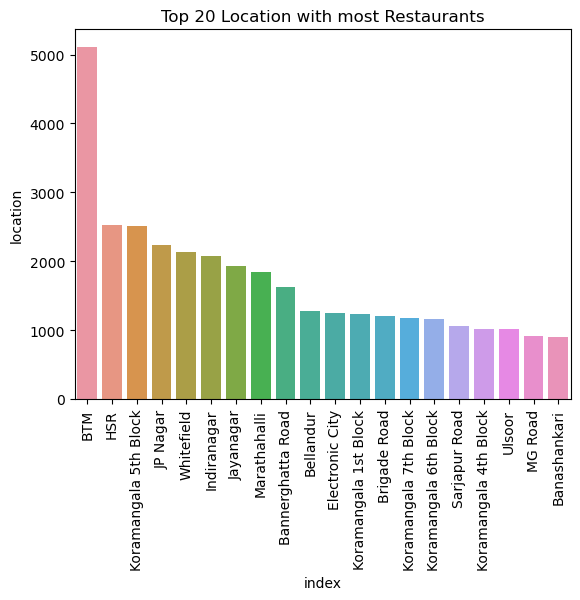

In [339]:
df_location=df.location.value_counts()[0:20].reset_index()
sns.barplot(x='index',y='location',data=df_location).set(title='Top 20 Location with most Restaurants')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Delivery'),
  Text(1, 0, 'Dine-out'),
  Text(2, 0, 'Desserts'),
  Text(3, 0, 'Cafes'),
  Text(4, 0, 'Drinks & nightlife'),
  Text(5, 0, 'Buffet'),
  Text(6, 0, 'Pubs and bars')])

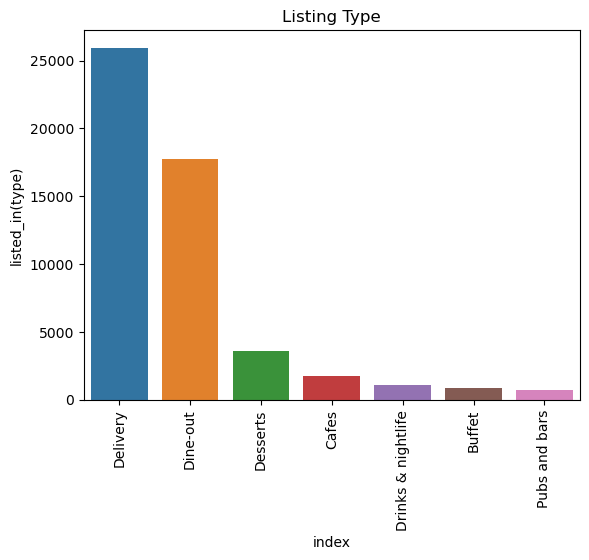

In [325]:
df_listing_type=df["listed_in(type)"].value_counts()[0:10].reset_index()
sns.barplot(x='index',y='listed_in(type)',data=df_listing_type).set(title='Listing Type')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

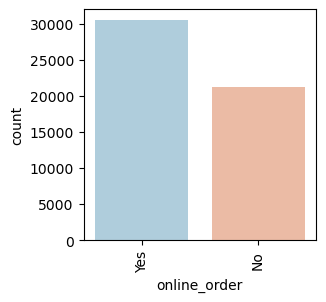

In [326]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(x='online_order',data=df,palette='RdBu_r', ax=ax)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

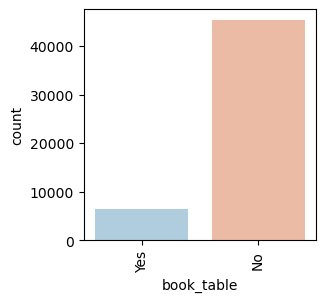

In [327]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(x='book_table',data=df,palette='RdBu_r', ax=ax)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='listed_in(type)', ylabel='rate'>

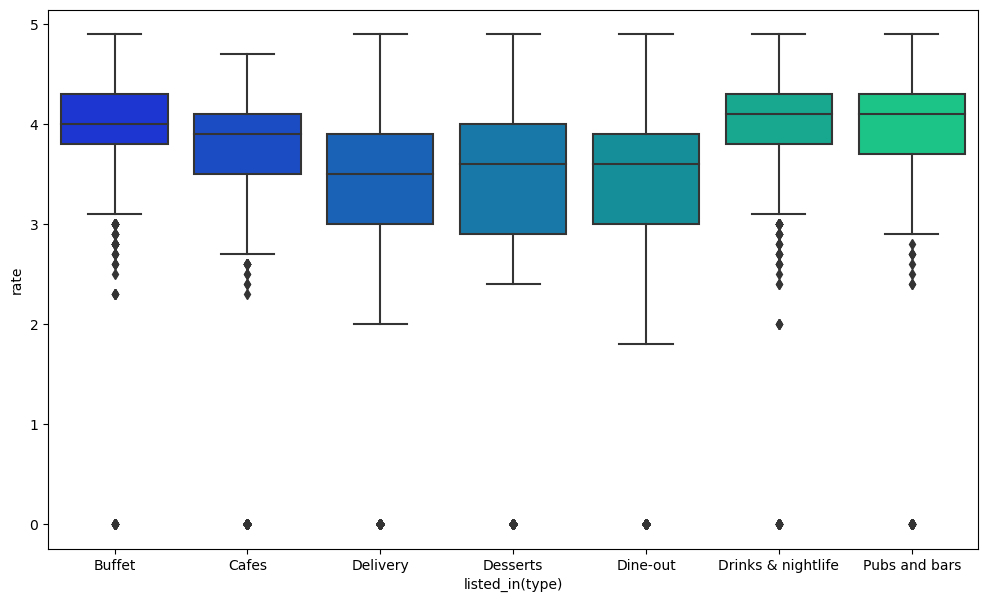

In [328]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='listed_in(type)',y='rate',data=df,palette='winter')

<AxesSubplot:xlabel='listed_in(type)', ylabel='cost_2'>

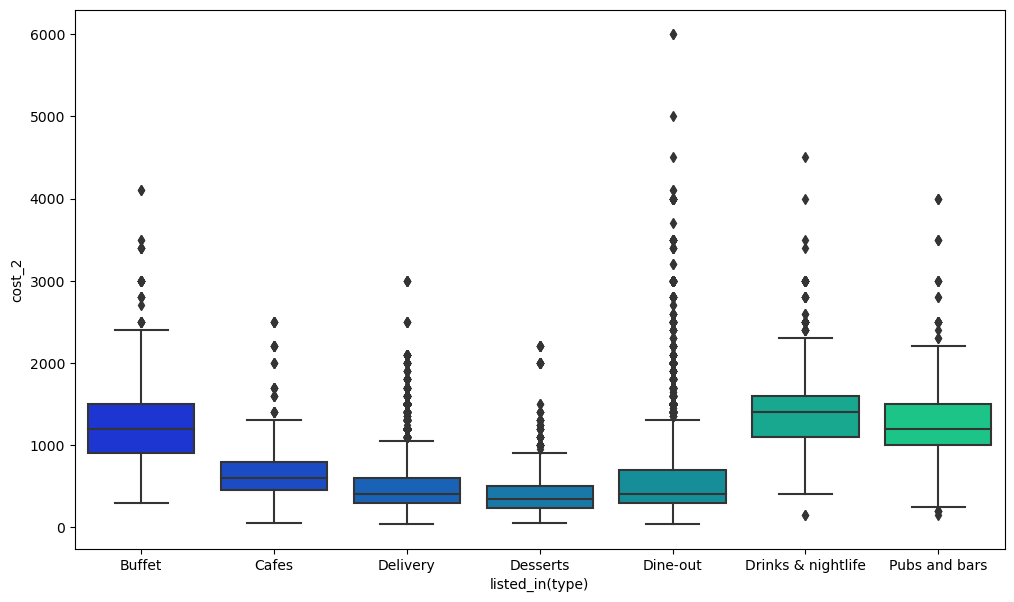

In [329]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='listed_in(type)',y='cost_2',data=df,palette='winter')

Which restaurant has most number of votes?

In [361]:
vote_count=df.groupby(by=["name"])["votes"].max().reset_index().sort_values(by=['votes'], ascending=False)[0:20]
vote_count

,name,votes
1274,Byg Brewski Brewing Company,16832
8231,Toit,14956
8269,Truffles,14726
129,AB's - Absolute Barbecues,12121
7751,The Black Pearl,10550
978,Big Pitcher,9300
5549,Onesta,9085
548,Arbor Brewing Company,8419
2446,Empire Restaurant,8304
5907,Prost Brew Pub,7871


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Byg Brewski Brewing Company'),
  Text(1, 0, 'Toit'),
  Text(2, 0, 'Truffles'),
  Text(3, 0, "AB's - Absolute Barbecues"),
  Text(4, 0, 'The Black Pearl'),
  Text(5, 0, 'Big Pitcher'),
  Text(6, 0, 'Onesta'),
  Text(7, 0, 'Arbor Brewing Company'),
  Text(8, 0, 'Empire Restaurant'),
  Text(9, 0, 'Prost Brew Pub'),
  Text(10, 0, 'Church Street Social'),
  Text(11, 0, 'Hoot'),
  Text(12, 0, 'Barbeque Nation'),
  Text(13, 0, 'Meghana Foods'),
  Text(14, 0, 'Flechazo'),
  Text(15, 0, 'The Hole in the Wall Cafe'),
  Text(16, 0, 'Biergarten'),
  Text(17, 0, 'Vapour Pub & Brewery'),
  Text(18, 0, 'TBC Sky Lounge'),
  Text(19, 0, "Chili's American Grill & Bar")])

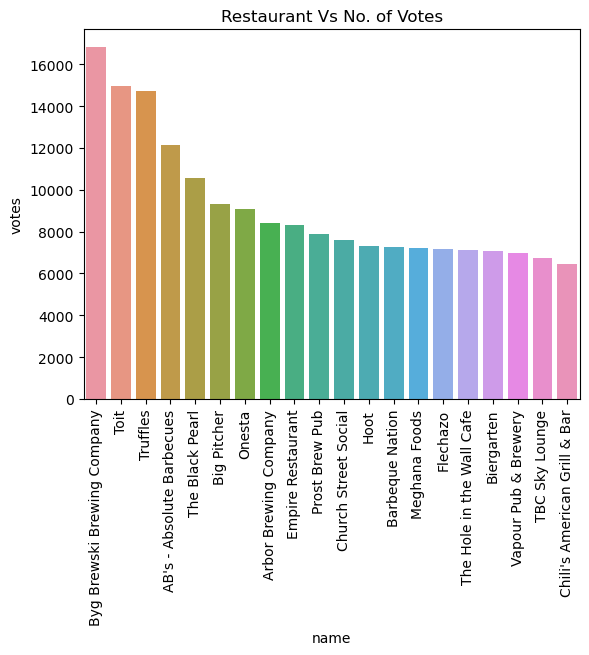

In [363]:
sns.barplot(x='name',y='votes',data=vote_count).set(title='Restaurant Vs No. of Votes')
plt.xticks(rotation=90)

What is the average rating for each cost range?

In [366]:
avg_rating=df.groupby(by=["cost_range"])["rate"].mean().reset_index()
avg_rating

,cost_range,rate
0,0-100,2.281720
1,100-500,2.601788
2,1000 - 2000,3.889655
3,2000 - 3000,4.035841
4,500 - 1000,3.280408
5,>3000,4.230380


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0-100'),
  Text(1, 0, '100-500'),
  Text(2, 0, '1000 - 2000'),
  Text(3, 0, '2000 - 3000'),
  Text(4, 0, '500 - 1000'),
  Text(5, 0, '>3000')])

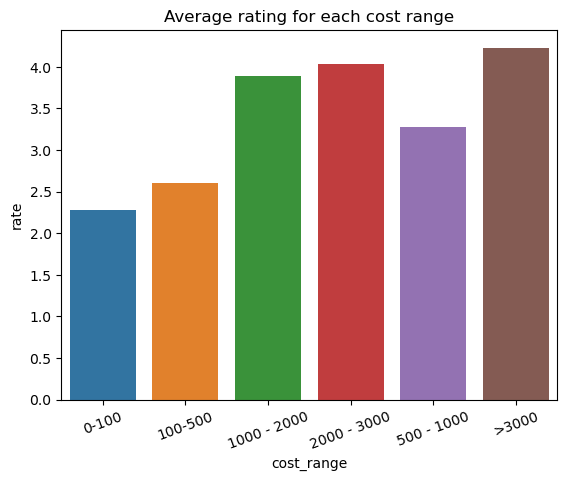

In [369]:
sns.barplot(x='cost_range',y='rate',data=avg_rating).set(title='Average rating for each cost range')
plt.xticks(rotation=20)

What type of restaurant gets the best rating?

In [370]:
best_rating_rest=df.groupby(by=["listed_in(type)"])["rate"].mean().reset_index().sort_values(by=['rate'], ascending=False)
best_rating_rest

,listed_in(type),rate
0,Buffet,3.859545
5,Drinks & nightlife,3.845704
6,Pubs and bars,3.696686
1,Cafes,3.429716
4,Dine-out,2.950206
2,Delivery,2.909735
3,Desserts,2.871918


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Buffet'),
  Text(1, 0, 'Drinks & nightlife'),
  Text(2, 0, 'Pubs and bars'),
  Text(3, 0, 'Cafes'),
  Text(4, 0, 'Dine-out'),
  Text(5, 0, 'Delivery'),
  Text(6, 0, 'Desserts')])

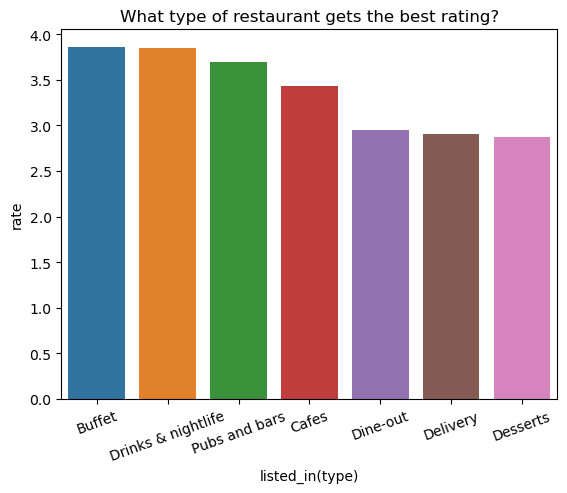

In [371]:
sns.barplot(x='listed_in(type)',y='rate',data=best_rating_rest).set(title='What type of restaurant gets the best rating?')
plt.xticks(rotation=20)

What is the average cost of two for each type of restaurant?

In [372]:
avg_cost=df.groupby(by=["listed_in(type)"])["cost_2"].mean().reset_index().sort_values(by=['cost_2'], ascending=False)
avg_cost

,listed_in(type),cost_2
5,Drinks & nightlife,1444.561243
6,Pubs and bars,1325.936599
0,Buffet,1305.227273
1,Cafes,627.481138
4,Dine-out,591.122937
2,Delivery,464.000425
3,Desserts,392.323963


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Drinks & nightlife'),
  Text(1, 0, 'Pubs and bars'),
  Text(2, 0, 'Buffet'),
  Text(3, 0, 'Cafes'),
  Text(4, 0, 'Dine-out'),
  Text(5, 0, 'Delivery'),
  Text(6, 0, 'Desserts')])

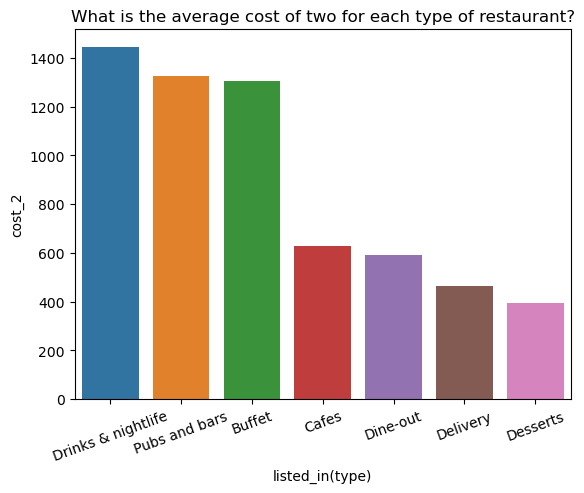

In [373]:
sns.barplot(x='listed_in(type)',y='cost_2',data=avg_cost).set(title='What is the average cost of two for each type of restaurant?')
plt.xticks(rotation=20)

Which restaurant type recieves the most votes?

In [374]:
most_vote=df.groupby(by=["listed_in(type)"])["votes"].max().reset_index().sort_values(by=['votes'], ascending=False)
most_vote

,listed_in(type),votes
2,Delivery,16832
4,Dine-out,16832
5,Drinks & nightlife,16832
1,Cafes,14723
0,Buffet,12121
6,Pubs and bars,10550
3,Desserts,9085


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Delivery'),
  Text(1, 0, 'Dine-out'),
  Text(2, 0, 'Drinks & nightlife'),
  Text(3, 0, 'Cafes'),
  Text(4, 0, 'Buffet'),
  Text(5, 0, 'Pubs and bars'),
  Text(6, 0, 'Desserts')])

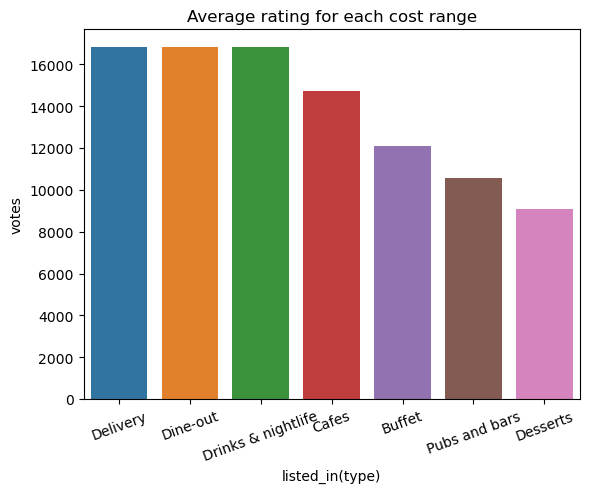

In [375]:
sns.barplot(x='listed_in(type)',y='votes',data=most_vote).set(title='Average rating for each cost range')
plt.xticks(rotation=20)